In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
#!pip install pyspark

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A PUJ/data_engineering/Semester 3/cdio/project/Denuncias.csv')

In [ ]:
df.head()

,Unnamed: 0,CEDULA,NOMBRE,EDAD,HORA DE DENUNCIA,ESTACION,GÉNERO,MES,DÍA,DENUNCIA_FALSA
0,NaN,1548927136,Maria Emiliana Peralta Mendez,26,10:30 a.m.,Ricaurte,Mujer,Diciembre,Lunes,1
1,NaN,1236578941,Juan Cortés Martinez,28,8:45 p.m.,Jiménez,Hombre,Octubre,Jueves,1
2,NaN,1982675304,Antonia Rodríguez Gómez,27,7:20 p.m.,Portal del Sur,Mujer,Diciembre,Viernes,0
3,NaN,1325476892,Juan Enrique Sánchez Díaz,29,9:15 p.m.,Museo Nacional,Hombre,Noviembre,Martes,0
4,NaN,1678934502,María Fernanda Castillo Reyes,30,11:00 a.m.,Jiménez,Mujer,Octubre,Sábado,1


In [ ]:
df.dtypes


Unnamed: 0          float64
CEDULA                int64
NOMBRE               object
EDAD                  int64
HORA DE DENUNCIA     object
ESTACION             object
GÉNERO               object
MES                  object
DÍA                  object
DENUNCIA_FALSA        int64
dtype: object

In [ ]:
import pandas as pd

#Limpio los datos de CEDULA, NOMBRE Y DENUNCIA
X = df.drop(['Unnamed: 0', 'CEDULA', 'NOMBRE', 'DENUNCIA_FALSA'], axis=1)

#DENUNCIA_FALSA SE CONVIERTE EN MI VARIABLE TARGET
y = df['DENUNCIA_FALSA']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((70, 6), (30, 6))

In [ ]:
y_train.shape, y_test.shape

((70,), (30,))

In [ ]:
!pip install category-encoders

In [ ]:
columns = X.columns.tolist()
print(columns)

['EDAD', 'HORA DE DENUNCIA', 'ESTACION', 'GÉNERO', 'MES', 'DÍA']


In [ ]:
#Para los tipos de datos que son object, se les hace una transform
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = columns)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
#Verificar la transformaci[on]
X_train.head()

,EDAD,HORA DE DENUNCIA,ESTACION,GÉNERO,MES,DÍA
11,1,1,1,1,1,1
47,2,2,2,1,2,2
85,3,3,2,1,3,1
28,2,4,2,2,4,2
93,4,5,2,2,1,3


In [ ]:
#Importar decision tree
from sklearn.tree import DecisionTreeClassifier

#Crear el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state = 0)

In [ ]:
#Entrenamiento

tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
#Calculo de las prediciones en Train y Test

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)


#Vamos a evaluar el modelo implementado con Decision Tree

In [ ]:
#Calculo de m[etricas]

from sklearn.metrics import accuracy_score


#C[alculo] el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("El accuracy en train es: ", train_accuracy_tree)
print("El accuracy en test es: ", test_accuracy_tree)

El accuracy en train es:  0.8285714285714286
El accuracy en test es:  0.8333333333333334


<ipython-input-38-5c3bd7b12748>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)


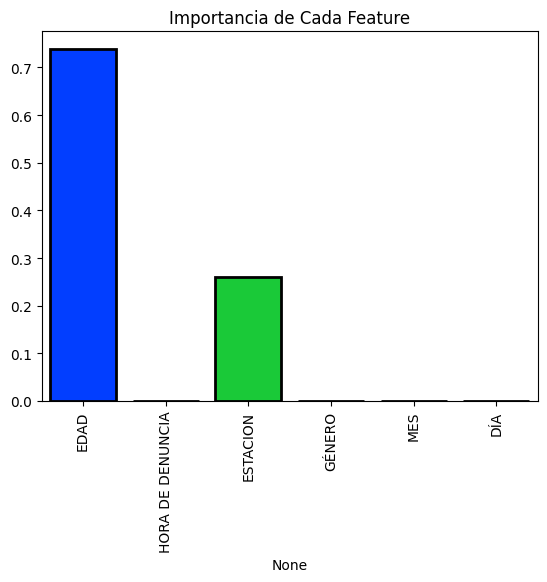

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined importances and columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de Cada Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
#Importamos el random Forest
from sklearn.ensemble import RandomForestClassifier

#Crear el modelo
random_forest = RandomForestClassifier(n_estimators=13, random_state=0000)


In [ ]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13, random_state=0)

In [ ]:
#Calcular de predicciones
y_train_pred = random_forest.predict( X_train)
y_test_pred = random_forest.predict( X_test)

#Evaluar el modelo


In [ ]:


#calculo accuracy
accuray_train = accuracy_score(y_train, y_train_pred)
accuray_test = accuracy_score(y_test, y_test_pred)

print("accuracy en train", accuray_train)
print("accuracy en test", accuray_test)

accuracy en train 0.9714285714285714
accuracy en test 0.8666666666666667


<ipython-input-63-5c3bd7b12748>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)


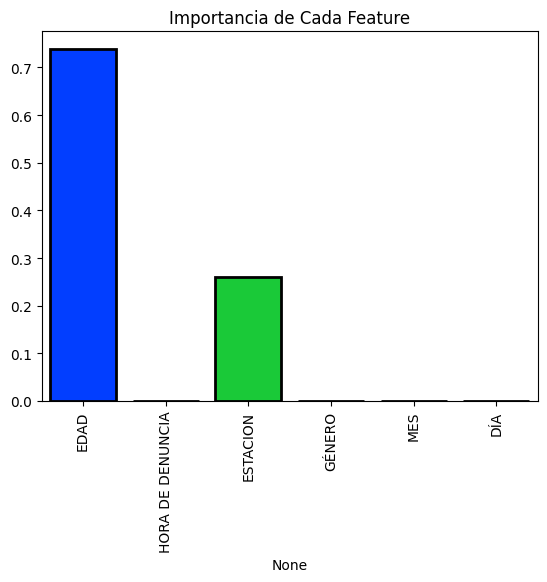

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined importances and columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de Cada Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()